In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


Using TensorFlow backend.


In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
print('Training data shape : ',train_X.shape,train_Y.shape)
print('Testing data shape : ',test_X.shape,test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
classes = np.unique(train_Y)
no_of_classes = len(classes)
print('Total number of classes : ',no_of_classes)
print("Classes : ", classes)

Total number of classes :  10
Classes :  [0 1 2 3 4 5 6 7 8 9]


It belongs to category 0


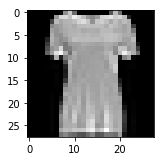

In [6]:
#sample image in the dataset
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[10,:,:],cmap='gray')
print('It belongs to category', train_Y[10])

In [7]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [8]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#convert to float and normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255
test_X = test_X/255

In [10]:
# one hot enoding
train_Y_onehot = to_categorical(train_Y)
test_Y_onehot = to_categorical(test_Y)

print('Normal label : ',train_Y[0])
print('One hot encoded label : ',train_Y_onehot[0])

Normal label :  9
One hot encoded label :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_onehot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape)
print(train_label.shape)
print(valid_X.shape)
print(valid_label.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


In [13]:
import keras

In [14]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [15]:
batch_size = 64
epochs = 20
no_of_classes = 10

In [16]:
myModel = Sequential()
myModel.add(Conv2D(32,kernel_size=(3,3),activation = 'linear',input_shape=(28,28,1),padding='same'))
myModel.add(LeakyReLU(alpha=0.1))
myModel.add(MaxPooling2D((2, 2),padding='same'))
myModel.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
myModel.add(LeakyReLU(alpha=0.1))
myModel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
myModel.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
myModel.add(LeakyReLU(alpha=0.1))                  
myModel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
myModel.add(Flatten())
myModel.add(Dense(128, activation='linear'))
myModel.add(LeakyReLU(alpha=0.1))                  
myModel.add(Dense(no_of_classes, activation='softmax'))

In [18]:
myModel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [23]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [25]:
fashion_train = myModel.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 101s 2ms/step - loss: 0.4555 - acc: 0.8355 - val_loss: 0.3134 - val_acc: 0.8843
Epoch 2/20
48000/48000 [==============================] - 102s 2ms/step - loss: 0.2818 - acc: 0.8970 - val_loss: 0.2773 - val_acc: 0.8981
Epoch 3/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.2363 - acc: 0.9124 - val_loss: 0.2578 - val_acc: 0.9040
Epoch 4/20
48000/48000 [==============================] - 99s 2ms/step - loss: 0.2057 - acc: 0.9241 - val_loss: 0.2540 - val_acc: 0.9082
Epoch 5/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.1798 - acc: 0.9338 - val_loss: 0.2367 - val_acc: 0.9169
Epoch 6/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.1591 - acc: 0.9404 - val_loss: 0.2405 - val_acc: 0.9139
Epoch 7/20
48000/48000 [==============================] - 103s 2ms/step - loss: 0.1363 - acc: 0.9499 - val_loss: 0.2469 - v

In [28]:
test_eval = myModel.evaluate(test_X, test_Y_onehot, verbose=0)

In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.4804817040104419
Test accuracy: 0.9153


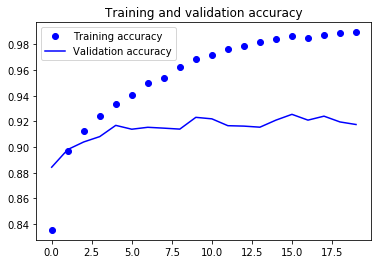

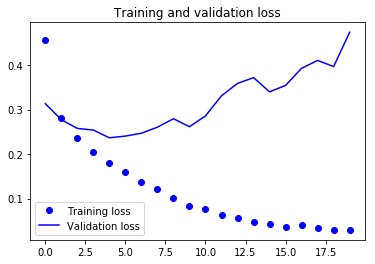

In [30]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()